In [30]:
#importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from textblob import TextBlob
import re
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

In [6]:
df=pd.read_csv('https://raw.githubusercontent.com/Aditya-Mankar/Census-Income-Prediction/master/adult.csv')
df=df.head(500)

In [7]:
df.shape

(500, 15)

In [8]:
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,54,Self-emp-not-inc,109418,Bachelors,13,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,1977,35,United-States,>50K
496,31,Private,110643,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,55,United-States,>50K
497,59,Self-emp-inc,122390,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,1977,48,United-States,>50K
498,46,Private,261059,Masters,14,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,1977,50,United-States,>50K


In [11]:
df['education'].value_counts()

HS-grad         118
Bachelors       108
Some-college     72
Masters          67
Prof-school      40
Doctorate        24
Assoc-voc        19
Assoc-acdm       14
10th             11
11th             10
7th-8th           7
5th-6th           6
1st-4th           2
9th               1
12th              1
Name: education, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, 'HS-grad'),
  Text(1, 0, 'Some-college'),
  Text(2, 0, '7th-8th'),
  Text(3, 0, '10th'),
  Text(4, 0, 'Doctorate'),
  Text(5, 0, 'Prof-school'),
  Text(6, 0, 'Bachelors'),
  Text(7, 0, 'Masters'),
  Text(8, 0, '11th'),
  Text(9, 0, 'Assoc-acdm'),
  Text(10, 0, 'Assoc-voc'),
  Text(11, 0, '1st-4th'),
  Text(12, 0, '5th-6th'),
  Text(13, 0, '12th'),
  Text(14, 0, '9th')])

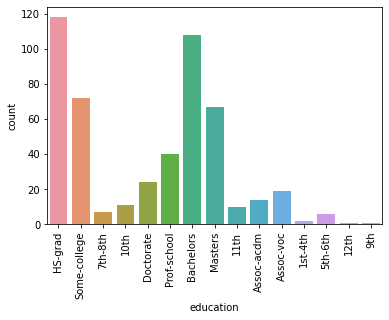

In [12]:
#visualizing the graph
sns.countplot(df['education'],label='count')
plt.xticks(rotation=90)

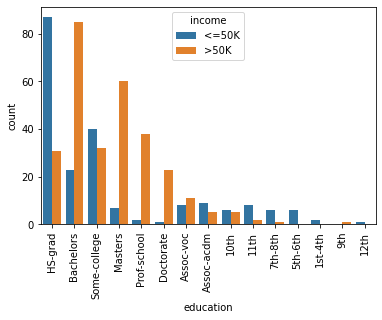

In [14]:
#get the count of income above and below 50k for each education type
sns.countplot(x='education',hue='income',order=df['education'].value_counts().index,data=df)
plt.xticks(rotation=90)
plt.show()

In [15]:
#Get the count of each values within the data
df['income'].value_counts()

>50K     294
<=50K    206
Name: income, dtype: int64

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='income', ylabel='count'>

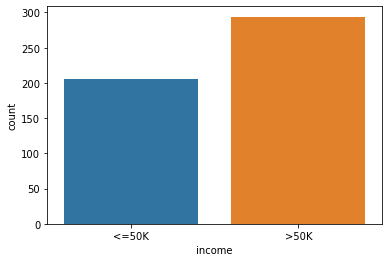

In [17]:
sns.countplot(df['income'])

In [24]:
#Create a list of categorical columns to keep
categorical_keep_columns=['age','workclass','education','relationship','marital.status']
new_df=df[categorical_keep_columns]

In [26]:
for column in new_df.columns:
    if new_df[column].dtype==np.number:
        continue
    new_df[column]=LabelEncoder().fit_transform(new_df[column])

<ipython-input-26-d06b574baa81>:2: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if new_df[column].dtype==np.number:
<ipython-input-26-d06b574baa81>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df[column]=LabelEncoder().fit_transform(new_df[column])


In [27]:
new_df

,age,workclass,education,relationship,marital.status
0,61,0,11,1,5
1,59,3,11,1,5
2,47,0,14,4,5
3,35,3,5,4,0
4,22,3,14,3,4
...,...,...,...,...,...
495,35,5,9,5,1
496,12,3,9,0,1
497,40,4,14,0,1
498,27,3,12,0,1


In [28]:
#Split the data
x=new_df.values
y=df['income'].values

In [29]:
#Split the data train and test 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [31]:
#Create and train the model
gb_clf=GradientBoostingClassifier(n_estimators=20,learning_rate=1,max_features=2,max_depth=2,random_state=0)
gb_clf.fit(x_train,y_train)



GradientBoostingClassifier(learning_rate=1, max_depth=2, max_features=2,
                           n_estimators=20, random_state=0)

In [33]:
#Show the models score on the training and test data sets
print('Accuracy score(training):',gb_clf.score(x_train,y_train))
print('Accuracy score(test):',gb_clf.score(x_test,y_test))

Accuracy score(training): 0.8575
Accuracy score(test): 0.79


In [45]:
#Create a function to convert the data to number  values
def get_number(age,workclass,education,relationshp,marital_status):
    number_list=[]
    number_list.append(new_df[new_df.age==age]['age'].values[0])
    number_list.append(new_df[new_df.workclass==workclass]['workclass'].values[0])
    number_list.append(new_df[new_df.education==education]['education'].values[0])
    number_list.append(new_df[new_df.relationship==relationship]['relationship'].values[0])
    number_list.append(new_df[new_df.marital.status==marital_status]['marital.status'].value[0])
    return [number_list]